¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
import sklearn.preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4075,0,19.0,47300.0,2,0
1277,1,26.0,62800.0,0,0
4024,1,39.0,35500.0,0,0
2217,1,32.0,40000.0,1,0
926,1,32.0,43200.0,1,0
3342,0,38.0,39000.0,3,0
1867,0,37.0,51500.0,1,0
3821,0,24.0,33900.0,0,0
4482,0,26.0,47200.0,2,0
4625,0,21.0,43300.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:

df['age'] = df['age'].astype('int')

In [8]:
# comprueba que la conversión se haya realizado con éxito

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [10]:
df.describe(np.linspace(0, 1, 11))

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
0%,0.000000,18.000000,5300.000000,0.000000,0.000000
10%,0.000000,20.000000,27200.000000,0.000000,0.000000
20%,0.000000,23.000000,31700.000000,0.000000,0.000000
30%,0.000000,25.000000,34700.000000,0.000000,0.000000
40%,0.000000,28.000000,37400.000000,1.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000


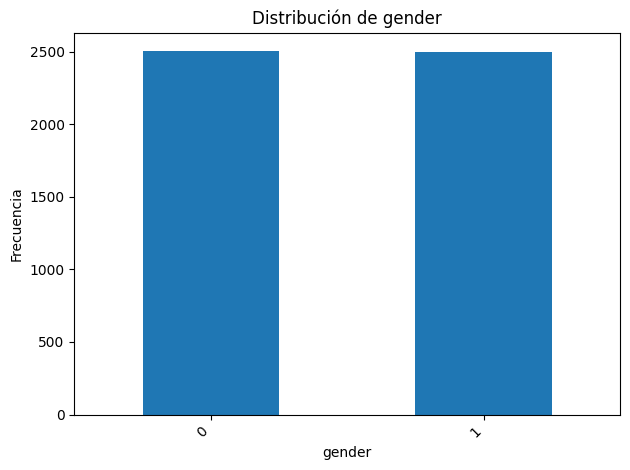

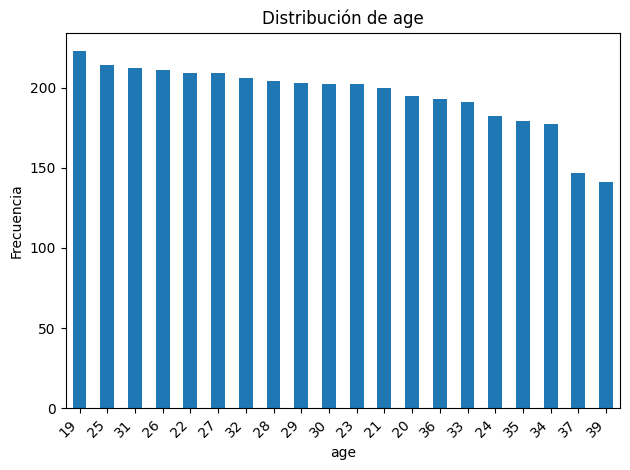

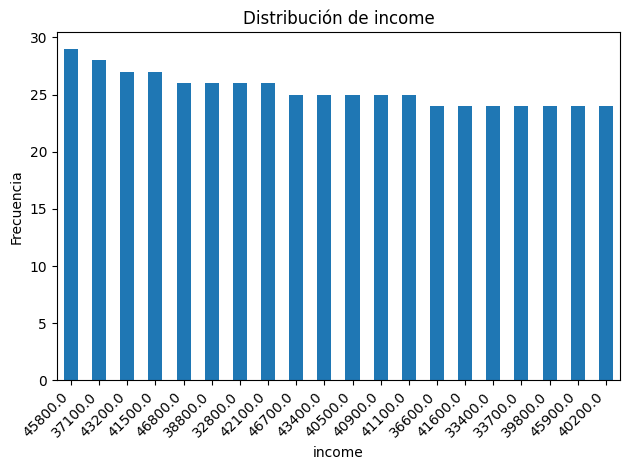

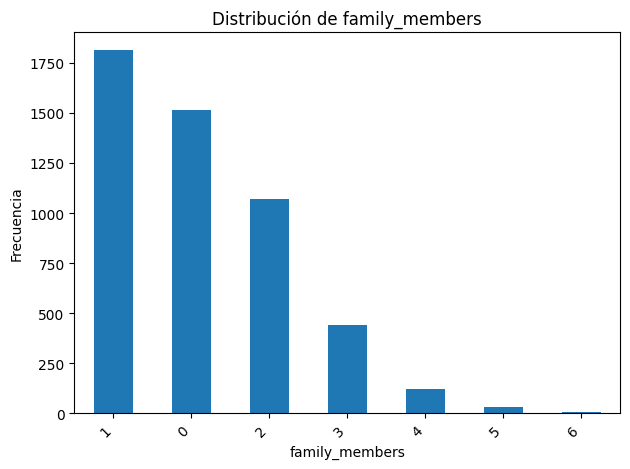

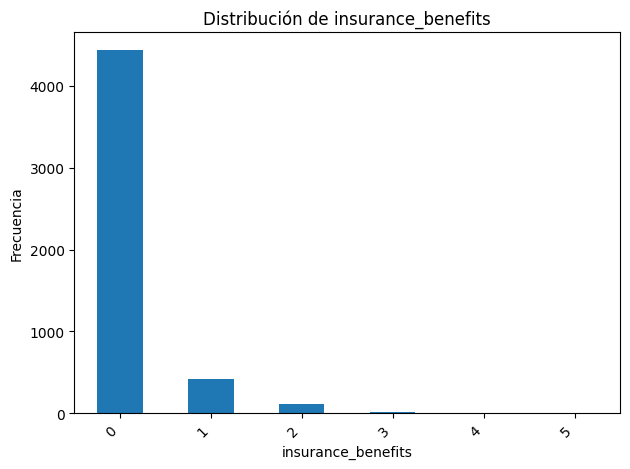

In [11]:
for x in df.columns:
    counts = df[x].value_counts().sort_values(ascending=False)
    top_counts = counts.head(20)
    top_counts.plot(kind='bar', title=f'Distribución de {x}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Importaste de forma correcta las librerías y módulos, cambiaste el formato de los nombres y verificaste que no hubiera outliers inválidos en los datos.
</div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

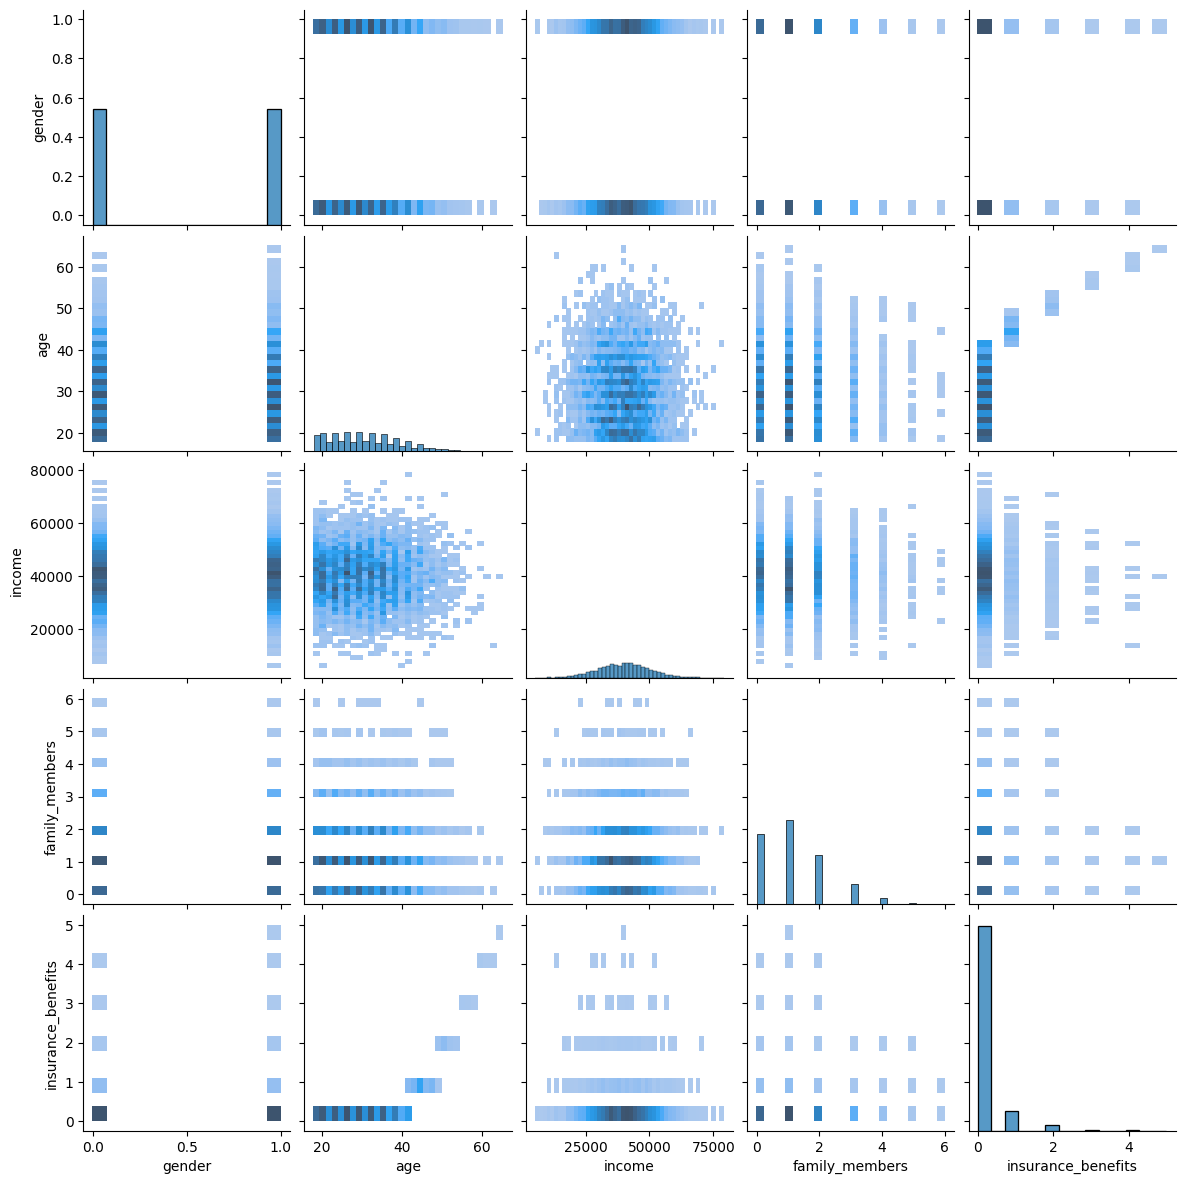

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de la gráfica de pares. 
</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df, n, k, metric='euclidean'):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    
    nbrs.fit(df)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4810,0.0,0.553846,0.527848,0.000000,0
2277,1.0,0.507692,0.469620,0.000000,0
1439,0.0,0.446154,0.454430,0.000000,0
4846,0.0,0.369231,0.524051,0.166667,0
3919,0.0,0.384615,0.630380,0.333333,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [17]:
get_knn(df_scaled[feature_names], n=1, k=5, metric='euclidean')

,gender,age,income,family_members,distance
1,0.0,0.707692,0.481013,0.166667,0.000000
4162,0.0,0.707692,0.477215,0.166667,0.003797
1863,0.0,0.707692,0.492405,0.166667,0.011392
4986,0.0,0.723077,0.491139,0.166667,0.018418
4477,0.0,0.692308,0.459494,0.166667,0.026453


In [18]:
get_knn(df_scaled[feature_names], n=1, k=5, metric='manhattan')

,gender,age,income,family_members,distance
1,0.0,0.707692,0.481013,0.166667,0.000000
4162,0.0,0.707692,0.477215,0.166667,0.003797
1863,0.0,0.707692,0.492405,0.166667,0.011392
4986,0.0,0.723077,0.491139,0.166667,0.025511
2434,0.0,0.676923,0.482278,0.166667,0.032035


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

El algoritmo kNN nos permite encontrar los vecinos mas cercanos, por lo que un dataframe que cuenta con diferentes datos y métricas puede favorecer a aquellos cuyas magnitudes son mayores en lugar de tener una perspectiva mas equilibrada de todas las columnas, esa es la razón por la que usamos los escaladores. 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Después de haber repetido la función cambiando únicamente la métrica de distancia podemos observar resultados muy parecidos, tal vez se nota un ligero aumento de la distancia en los vecinos 4 y 5 pero nada demasiado relevante, en cualquier caso ante esta ligera diferencia se sugiere usar la métrica euclidiana. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien implementado el modelo. Como acabas de notar, el escalado es muy importante debido a que permite que variables numéricas con rangos muy diferentes sean comparables. Sin escalar los datos las características con valores más grandes pueden dominar las métricas de distancia y no obtener resultados precisos.
</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [19]:
# сalcula el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'] > 0

In [20]:
# comprueba el desequilibrio de clases con value_counts()
print(df['insurance_benefits_received'].value_counts())

print(df['insurance_benefits_received'].value_counts(normalize=True)*100)

False    4436
True      564
Name: insurance_benefits_received, dtype: int64
False    88.72
True     11.28
Name: insurance_benefits_received, dtype: float64


In [21]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [22]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [23]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P=P, size=len(df))# <tu código aquí> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente! Tu balanceo de clases usando downsampling, separación de datos y resultados del modelo fueron muy buenos! Cuál sería tu intepretación del hecho que el escalado de datos mejore considerablemente el F1?
    
</div>

### El escalado de datos mejora considerablemente el F1 debido a que, cuando revisamos el dataframe original observamos que la escala de valores es muy diferente para cada columna, debido a ello valores como income, son de magnitud notablemente mas grande respecto a otros como gender, que tiene un valor binario 0 o 1. 

### KNN Model

In [24]:
def kclass(x_train, y_train,x_test,y_test, k, metric_to_use):
    
    """
    Devuelve los k vecinos más cercanos

    :param x_train: datos caracteristicas de entrenamiento
    :param y_train: datos objetivo entrenamiento
    :param x_test: datos caracteristicas de prueba
    :param y_test: datos prueba objetivo
    :param k: número de vecinos más cercanos a devolver
    :param metric_to_use: nombre de la métrica de distancia: ‘euclidean’,‘manhattan’   """

    k_class = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, metric=metric_to_use)
    k_class.fit(x_train.values,y_train.values)
    y_pred = k_class.predict(x_test)
    
    print(eval_classifier(y_test,y_pred))
    print()
    print(sklearn.metrics.classification_report(y_test,y_pred))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[feature_names],df['insurance_benefits_received'],test_size = 0.33,random_state=8)

kclass(x_train, y_train, x_test, y_test,8, 'euclidean')



F1: 0.02
Matriz de confusión
[[8.91515152e-01 6.06060606e-04]
 [1.06666667e-01 1.21212121e-03]]
None

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1472
        True       0.67      0.01      0.02       178

    accuracy                           0.89      1650
   macro avg       0.78      0.51      0.48      1650
weighted avg       0.87      0.89      0.84      1650



In [26]:
kclass(x_train, y_train, x_test, y_test,8, 'manhattan')

F1: 0.02
Matriz de confusión
[[8.91515152e-01 6.06060606e-04]
 [1.06666667e-01 1.21212121e-03]]
None

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1472
        True       0.67      0.01      0.02       178

    accuracy                           0.89      1650
   macro avg       0.78      0.51      0.48      1650
weighted avg       0.87      0.89      0.84      1650



### Con escalado de datos. 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled[feature_names],df['insurance_benefits_received'],test_size = 0.33,random_state=8)

In [28]:
kclass(x_train, y_train, x_test, y_test,8, 'euclidean')

F1: 0.88
Matriz de confusión
[[0.89212121 0.        ]
 [0.02242424 0.08545455]]
None

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1472
        True       1.00      0.79      0.88       178

    accuracy                           0.98      1650
   macro avg       0.99      0.90      0.94      1650
weighted avg       0.98      0.98      0.98      1650



In [29]:
kclass(x_train, y_train, x_test, y_test,8, 'manhattan')

F1: 0.90
Matriz de confusión
[[0.89212121 0.        ]
 [0.01939394 0.08848485]]
None

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1472
        True       1.00      0.82      0.90       178

    accuracy                           0.98      1650
   macro avg       0.99      0.91      0.95      1650
weighted avg       0.98      0.98      0.98      1650



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo implementando el modelo de regresión lineal tanto para los datos originales como los escalados. Como pudiste notar, el usar un conjunto u otro no afecta a los resultados obtenidos por el modelo, cuál sería tu interpretación de este hecho?
</div>

### Resulta muy evidente que el escalado de los datos favorece la métrica F1, pasando de valores cercanos a cero en cualquiera de los dos tipos de distancia, a valores de 0.88 (euclidean) y 0.90 (manhattan) respectivamente 

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [30]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # Añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular los pesos usando la fórmula de la pseudoinversa
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # Añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Realizar la predicción
        y_pred = X2 @ self.weights
        
        return y_pred

In [31]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')

In [32]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.53923892e-01  3.56896799e-02  2.26513891e-02  2.39531643e-08
 -1.12925654e-02]
RMSE: 0.35
R2: 0.42


In [33]:
print(df_scaled.head())
print(df.head())

   gender       age    income  family_members  insurance_benefits
0     1.0  0.630769  0.627848        0.166667                   0
1     0.0  0.707692  0.481013        0.166667                   1
2     0.0  0.446154  0.265823        0.000000                   0
3     0.0  0.323077  0.527848        0.333333                   0
4     1.0  0.430769  0.330380        0.000000                   0
   gender  age   income  family_members  insurance_benefits  \
0       1   41  49600.0               1                   0   
1       0   46  38000.0               1                   1   
2       0   29  21000.0               0                   0   
3       0   21  41700.0               2                   0   
4       1   28  26100.0               0                   0   

   insurance_benefits_received  
0                        False  
1                         True  
2                        False  
3                        False  
4                        False  


In [34]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits_received'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [35]:
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.67007206  1.60941507  0.00760203  0.04058376 -0.03165828]
RMSE: 0.23
R2: 0.43


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente! Lograste ofuscar los datos originales de forma adecuada y después recuperarlos a través de operaciones matriciales. Si bien hay una diferencia muy pequeña entre los datos orginales y los datos recuperados, se debe a los redondeos que se están realizando al hacer las operaciones.
</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [36]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
df_pn.head(5)

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


In [37]:
X = df_pn.to_numpy()
print(X)
print(X.shape)

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]
(5000, 4)


Generar una matriz aleatoria $P$.

In [38]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [39]:
PPinv = P @ np.linalg.inv(P)
print(PPinv)
print()
PinvP = np.linalg.inv(P) @ P
print(PinvP)

np.linalg.det(PPinv),np.linalg.det(PinvP)

[[ 1.00000000e+00 -1.69848573e-16 -7.58122972e-17 -1.13112497e-16]
 [-6.94895396e-17  1.00000000e+00 -7.10568689e-17  3.59096970e-17]
 [-1.21269339e-16 -8.01461326e-17  1.00000000e+00  4.30764008e-19]
 [-3.60694539e-16 -5.55430227e-16  3.08072404e-16  1.00000000e+00]]

[[ 1.00000000e+00 -5.50791672e-16 -5.00098731e-16 -2.57000677e-16]
 [-5.01929420e-17  1.00000000e+00 -2.91131489e-16 -5.21164428e-17]
 [-8.80703657e-17 -8.52396441e-17  1.00000000e+00  6.69673657e-18]
 [-1.04768034e-17 -9.83452208e-17 -1.10108947e-16  1.00000000e+00]]


(1.0, 0.9999999999999999)

In [40]:
X2 = X @ P

print(X2)
print()
print(X2.shape)

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]

(5000, 4)


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

### Se complica poder identificar valores como la edad o los ingresos posterior a la transformación, lo cual cumple con su objetivo. 

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [41]:
X_original = np.dot(X2 , np.linalg.inv(P))
print(X_original)
print()
display(df_pn)
display(pd.DataFrame(X_original,columns=personal_info_column_list))

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 ...
 [-1.92837871e-12  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]



,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4995,0,28,35700.0,2
4996,0,34,52400.0,1
4997,0,20,33900.0,2
4998,1,22,32700.0,3


,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4995,-2.559766e-12,28.0,35700.0,2.000000e+00
4996,-5.486091e-12,34.0,52400.0,1.000000e+00
4997,-1.928379e-12,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [42]:
X[2:10]

array([[0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       [0.00e+00, 2.10e+01, 4.17e+04, 2.00e+00],
       [1.00e+00, 2.80e+01, 2.61e+04, 0.00e+00],
       [1.00e+00, 4.30e+01, 4.10e+04, 2.00e+00],
       [1.00e+00, 3.90e+01, 3.97e+04, 2.00e+00],
       [1.00e+00, 2.50e+01, 3.86e+04, 4.00e+00],
       [1.00e+00, 3.60e+01, 4.97e+04, 1.00e+00],
       [1.00e+00, 3.20e+01, 5.17e+04, 1.00e+00]])

In [43]:
X2[2:10]

array([[ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       [ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753],
       [ 5258.77025195, 18509.8596165 , 15237.19342704, 38032.31715339],
       [ 5091.84582008, 17920.45540783, 14752.11143673, 36824.37841067],
       [ 4950.8900715 , 17413.01768645, 14334.46448264, 35794.3865001 ],
       [ 6372.05574967, 22420.56515812, 18457.36484575, 46089.44286752],
       [ 6627.90630563, 23317.43454451, 19195.91633541, 47939.82858799]])

In [44]:
X_original[2:10]

array([[-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       [-4.84498208e-12,  2.10000000e+01,  4.17000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  2.61000000e+04,
        -1.01990740e-13],
       [ 1.00000000e+00,  4.30000000e+01,  4.10000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  3.90000000e+01,  3.97000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.50000000e+01,  3.86000000e+04,
         4.00000000e+00],
       [ 1.00000000e+00,  3.60000000e+01,  4.97000000e+04,
         1.00000000e+00],
       [ 1.00000000e+00,  3.20000000e+01,  5.17000000e+04,
         1.00000000e+00]])

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

### La razón de esto es que la multiplicación por la matriz se hace con numeros con decimales. 

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Los valores w y wp no son afectados al momenot de dar resultados, ya que tenemos que w es la formula para la regresion lineal y wp es la la formula w pero con un coeficiente que afecta a todas las matrices X por lo que en teoria no afectaria el resultado ya que todas las matrices X se estan multiplicando por un coeficiente P, resultando en que no debieran existir afectaciones asimétricas. 

**Prueba analítica**

Coeficientes de la regresión lineal sin ofuscación

Para la regresión lineal sin ofuscación, los coeficientes \( w \) se calculan como:

\[
w = (X^T X)^{-1} X^T y
\]

donde:
- \( X \) es la matriz de características,
- \( y \) es el vector de valores observados.

Coeficientes de la regresión lineal con ofuscación

Después de la ofuscación, tenemos los nuevos datos \( X \times P \). Los nuevos coeficientes \( w_P \) se calculan como:

\[
w_P = [(X \times P)^T (X \times P)]^{-1} (X \times P)^T y
\]

Simplificación de la fórmula de \( w_P \)

Primero, simplifiquemos la fórmula de \( w_P \):

\[
w_P = [(P^T X^T X P)]^{-1} (P^T X^T y)
\]

Aplicando la propiedad de matrices \( (AB)^{-1} = B^{-1} A^{-1} \), tenemos:

\[
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
\]

Como \( P^{-1} P = I \) (la identidad), esto se simplifica a:

\[
w_P = P^{-1} (X^T X)^{-1} X^T y
\]

Finalmente, usando \( w = (X^T X)^{-1} X^T y \):

\[
w_P = P^{-1} w
\]

Valores predichos con \( w_P \)

Los valores predichos para un nuevo conjunto de datos \( X \times P \) serían:

y^P = (X \times P) w_P

Sustituyendo \( w_P \):

y^P = (X \times P) P^{-1} w = X I w = X w = y^

Conclusión

Hemos demostrado que los valores predichos y^P con la matriz ofuscada son idénticos a los valores predichos y^ sin ofuscación. Esto implica que la ofuscación de los datos no afecta los valores predichos.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda en este apartado realiar la prueba de la ofuscación de datos
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [45]:
rng = np.random.default_rng(seed=8)
P = rng.random(size=(X.shape[1],X.shape[1]))
print(P)

[[0.32697228 0.98727684 0.31871084 0.78854894]
 [0.86989651 0.39108481 0.43788187 0.3727489 ]
 [0.1069536  0.47896545 0.24135215 0.25714525]
 [0.18473156 0.19386455 0.81382767 0.42298419]]


In [46]:
PPinv = P @ np.linalg.inv(P)
print(PPinv)
print()
PinvP = np.linalg.inv(P) @ P
print(PinvP)

np.linalg.det(PPinv),np.linalg.det(PinvP)

[[ 1.00000000e+00  9.86623302e-17 -1.23723811e-16 -8.16348788e-17]
 [-2.29675668e-17  1.00000000e+00 -3.10372939e-17  1.38623180e-17]
 [ 6.51018143e-17  1.96453639e-17  1.00000000e+00  5.73044535e-18]
 [ 1.07742401e-16  4.01515320e-17 -5.47924968e-16  1.00000000e+00]]

[[ 1.00000000e+00  7.34395537e-17  9.87605640e-17  1.17319054e-17]
 [ 3.83458516e-17  1.00000000e+00  4.60563511e-17  1.11281826e-16]
 [ 6.94628773e-18 -1.63965000e-16  1.00000000e+00  1.23898030e-16]
 [ 2.11149534e-18 -2.63308877e-16 -4.96613131e-17  1.00000000e+00]]


(0.9999999999999998, 1.0)

Regresion Lineal con datos sin ofuscar.

In [47]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits_received'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)


lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.67007206  1.60941507  0.00760203  0.04058376 -0.03165828]
RMSE: 0.23
R2: 0.43


Regresión Lineal con datos ofuscados.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X@P, y, test_size=0.3, random_state=8)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.67007206 -0.36259222 -1.28307913 -2.0569196   4.62912242]
RMSE: 0.23
R2: 0.43


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Como ya demostramos anteriormente no existe diferencias entre el RMSE y R2 usando los datos originales y los datos ofuscados.
</div>

# Conclusiones

Tarea 1: 

Resulta interesante la relevancia del escalado de datos para encontrar los vecinos cercanos, respecto al tipo de métricas, a pesar de que se sugiere la métrica euclidiana, no resulta tan diferente a manhattan. 

Tarea 2:

De nuevo observamos la relevancia del escalado de los datos, sin embargo en este caso la métrica manhattan obtiene un mejor valor F1, en este caso el modelo predictivo kNN demostro que sin escalado de datos el valor de F1 no difiere demasiado del modelo dummy, confirmando la relevancia antes mostrada. 

Tarea 3: 

Se construye el modelo para poder predecir si los clientes recibirán o no beneficios del seguro, encontrando que para los datos sin escalar el RMSE es de 0.35 con un R2 de 0.42, mientras que para los datos escalados: RMSE: 0.23 R2: 0.43 mostrando una leve pero relevante mejora. 

Tarea 4: 

El ofuscado de datos cumplió su propósito, hacer prácticamente inindentificables los datos originales a través de la multiplicación con una matriz aleatoria. 

Tarea 5:

Los valores obtenidos al realizar la regresión lineal al df original y a los datos ofuscados demuestran la factibilidad de trabajar con este tipo de datos en lugar de los datos originales, encontrando en ambos un RMSE de 0.23 y un R2 de 0.43



<div class="alert alert-block alert-success">
<b>Resumen de la revisión</b> <a class="tocSkip"></a>

Muy buen trabajo, Alejandro! Te hice un comentario en donde te sugiero complementar con una interpretación, además de que te hice unas pequeñas correcciones en el inciso final del proyecto para evitar unos errores que estaban surgiendo. Sigue esforzándote!
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [x]  Se ha realizado la tarea 1
    - [x]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [x]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [x]  Se respondieron las preguntas sobre la escala/distancia- [x]  Se ha realizado la tarea 2
    - [x]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [x]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [x]  Se ha realizado la tarea 3
    - [x]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [x]  Se calculó la RECM para la solución implementada- [x]  Se ha realizado la tarea 4
    - [x]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [x]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [x]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [x]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [x]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>